# Insurance Claims- Fraud Detection
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, we will be working with some auto insurance data to demonstrate how we can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##Importing Dataset
df=pd.read_csv("C://Users/Satyam Meena/Desktop/Data Science/Data/insurance_claims.csv")

In [2]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
#Checking Dimension of Dataframe
df.ndim

2

In [5]:
#Checking Shape of Dataframe
df.shape

(1000, 40)

In [6]:
#Checking Datatypes of columns of Dataframe
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
#Checking Nullvalues in the Dataframe
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

From here we can notice that whole _c39 column is blank, means all values in _c39 is null values, that's why this column needs to remove.

In [8]:
#Checking different values total counts in the column
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

We can notice that police_report_available column has 343 '?' value which has no meaning and needs to replace.

In [9]:
#Replacing value in the column
df['police_report_available']=df['police_report_available'].replace('?','NO')

Here we have replaced all '?' values in the column by 'No'.

In [10]:
#Checking different values total counts in the column
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [11]:
#Checking different values total counts in the column
df['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [12]:
#Checking different values total counts in the column
df['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

In [13]:
#Checking different values total counts in the column
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [14]:
#Checking different values total counts in the column
df['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [15]:
#Checking different values total counts in the column
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [16]:
#Checking different values total counts in the column
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [17]:
#Droping unnecessary columns
df=df.drop(['policy_bind_date','auto_year','_c39','incident_location','insured_sex','incident_city','incident_hour_of_the_day','insured_education_level','insured_occupation','insured_hobbies','incident_date','insured_relationship'],axis=1)
#We dropped all unnecessary columns from the dataframe. And this is our improved dataframe:

In [18]:
#Checking Dataframe
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,53300,...,1,2,YES,71610,6510,13020,52080,Saab,92x,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,0,...,0,0,NO,5070,780,780,3510,Mercedes,E400,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,35100,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,48900,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,66000,...,0,1,NO,6500,1300,650,4550,Accura,RSX,N


(array([247.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 753.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

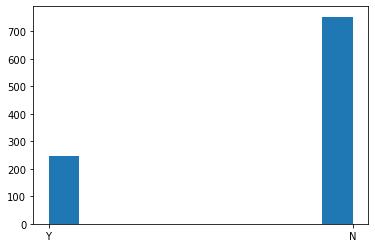

In [19]:
#EDA
# Histogram Plot / Univariate Analysis
plt.hist(df['fraud_reported'])

From above plot we can observe that there are less fraud and more honest people. On an approx Yes is around 250 and No is around 750.

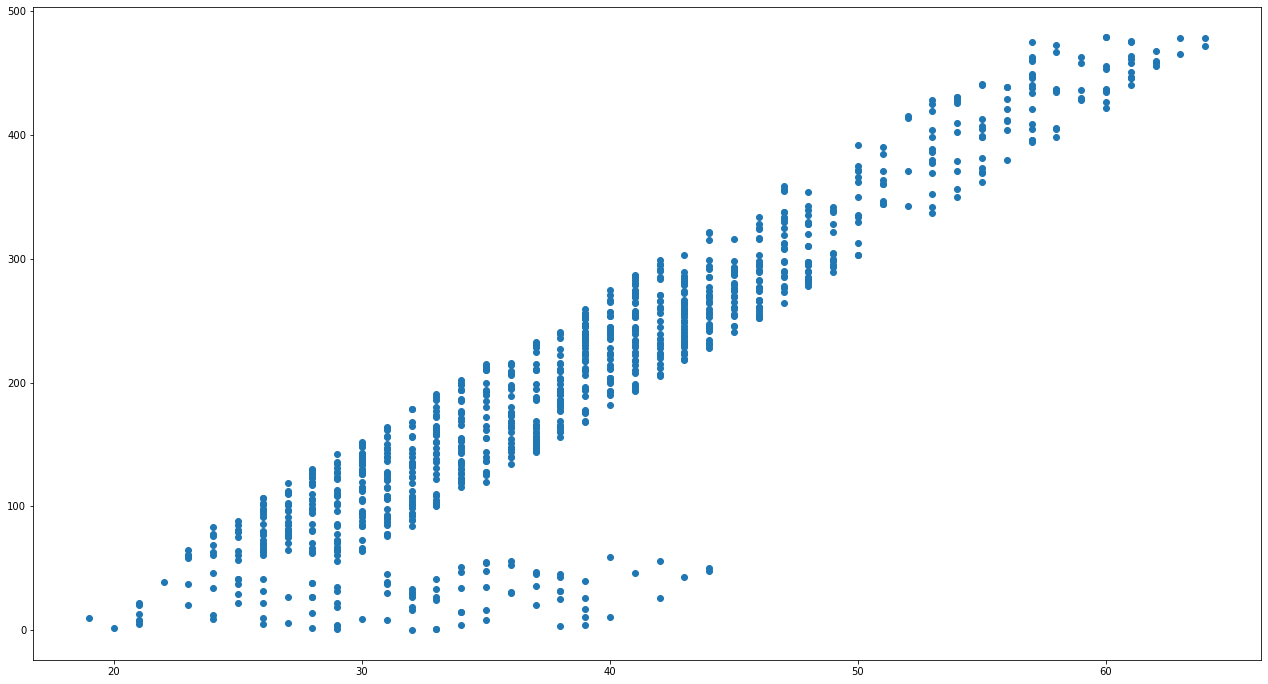

In [20]:
#Scattered Plot / Bivariate Analysis
plt.figure(figsize=[22,12])
plt.scatter(df['age'],df['months_as_customer'])

We can observe that as age of customer increase, months of customer increase for most of the data.

<BarContainer object of 1000 artists>

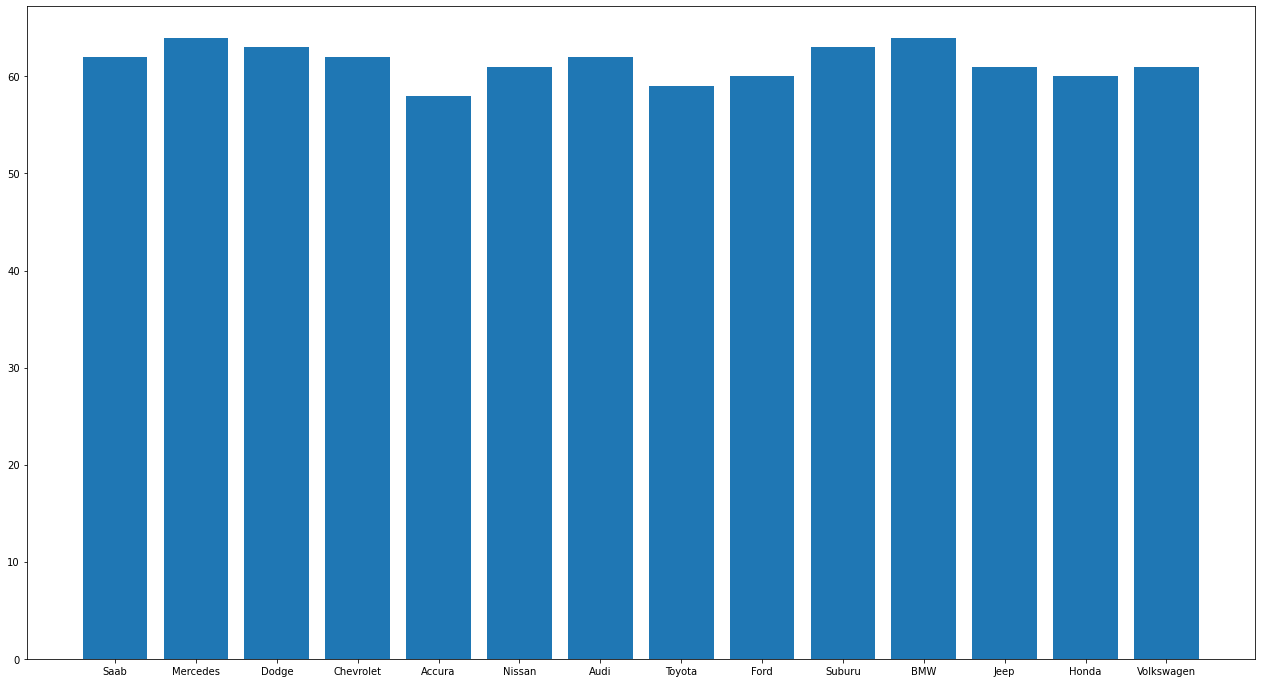

In [21]:
#Bar Graph / Bivariate Analysis
plt.figure(figsize=[22,12])
plt.bar(df['auto_make'],df['age'])

We can observe that Mercedes and BMW has the highest peak of age group and Accura has the lowest.

<BarContainer object of 1000 artists>

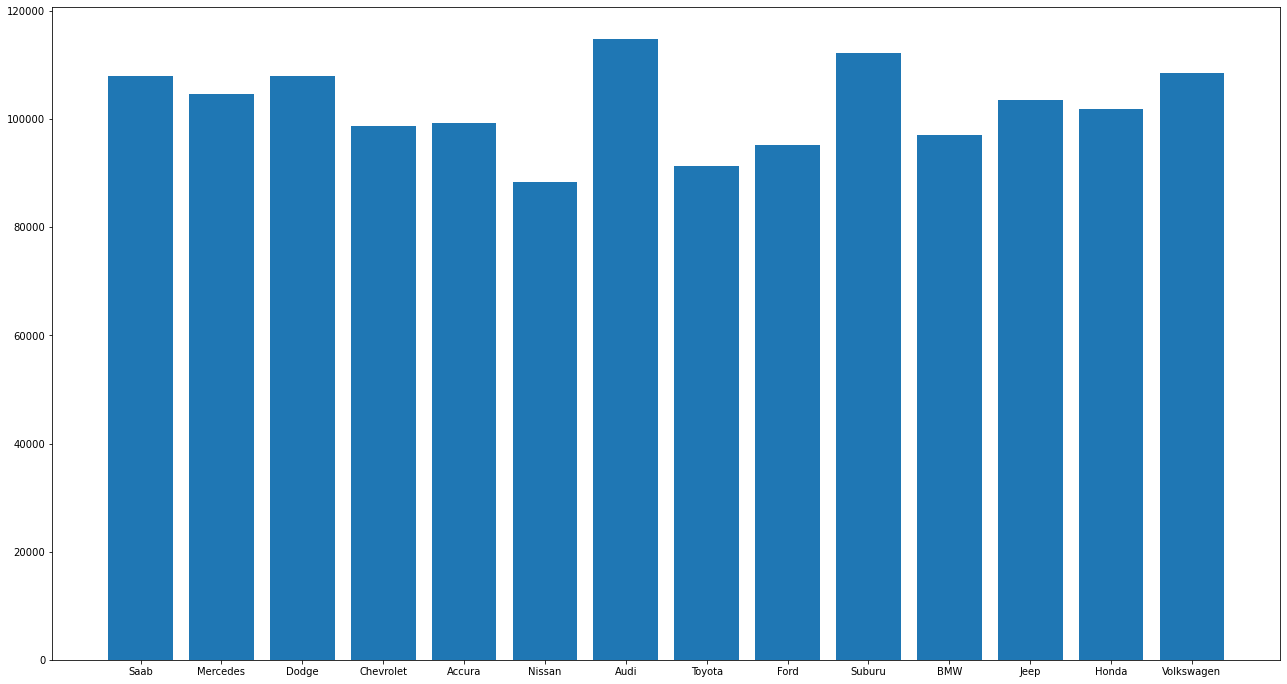

In [22]:
#Bar Graph / Bivariate Analysis
plt.figure(figsize=[22,12])
plt.bar(df['auto_make'],df['total_claim_amount'])

In this graph we can observe that Audi has the highest claim amount while Nissan has the lowest.

# Label Encoding
We noticed before that some columns have object datatype, that needs to change to numeric (either int or float) datatype, so that our model can read the data.

In [23]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['policy_csl']=le.fit_transform(df['policy_csl'])
df['policy_state']=le.fit_transform(df['policy_state'])
df['incident_type']=le.fit_transform(df['incident_type'])
df['collision_type']=le.fit_transform(df['collision_type'])
df['incident_severity']=le.fit_transform(df['incident_severity'])
df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])
df['incident_state']=le.fit_transform(df['incident_state'])
df['property_damage']=le.fit_transform(df['property_damage'])
df['police_report_available']=le.fit_transform(df['police_report_available'])
df['auto_make']=le.fit_transform(df['auto_make'])
df['auto_model']=le.fit_transform(df['auto_model'])
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

In [24]:
#Checking Improved DataFrame
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,521585,2,1,1000,1406.91,0,466132,53300,...,1,2,1,71610,6510,13020,52080,10,1,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,0,...,0,0,0,5070,780,780,3510,8,12,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,35100,...,2,3,0,34650,7700,3850,23100,4,30,0
3,256,41,227811,0,1,2000,1415.74,6000000,608117,48900,...,1,2,0,63400,6340,6340,50720,3,34,1
4,228,44,367455,0,2,1000,1583.91,6000000,610706,66000,...,0,1,0,6500,1300,650,4550,0,31,0


We can notice that all string values are converted to numeric values.

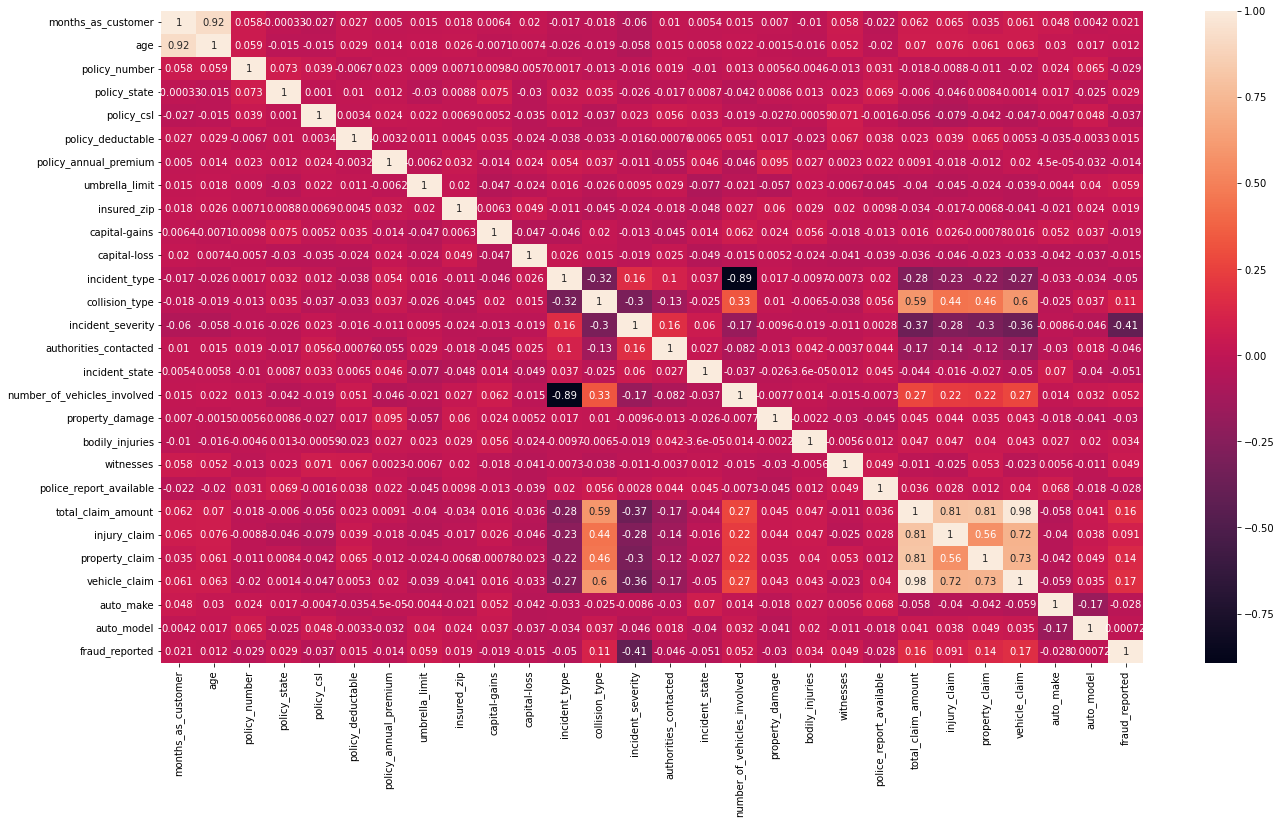

In [25]:
#Correlation
#Checking Correlation / Multivariate Analysis 
corr=df.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr,annot=True)
plt.show()

In [26]:
#Checking Correlation with respect to target column
corr['fraud_reported'].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
authorities_contacted         -0.045802
policy_csl                    -0.037190
property_damage               -0.030497
policy_number                 -0.029443
police_report_available       -0.027768
auto_make                     -0.027519
capital-gains                 -0.019173
capital-loss                  -0.014863
policy_annual_premium         -0.014480
auto_model                     0.000720
age                            0.012143
policy_deductable              0.014817
insured_zip                    0.019368
months_as_customer             0.020544
policy_state                   0.029432
bodily_injuries                0.033877
witnesses                      0.049497
number_of_vehicles_involved    0.051839
umbrella_limit                 0.058622
injury_claim                   0.090975
collision_type                 0.110130
property_claim                 0.137835


<AxesSubplot:>

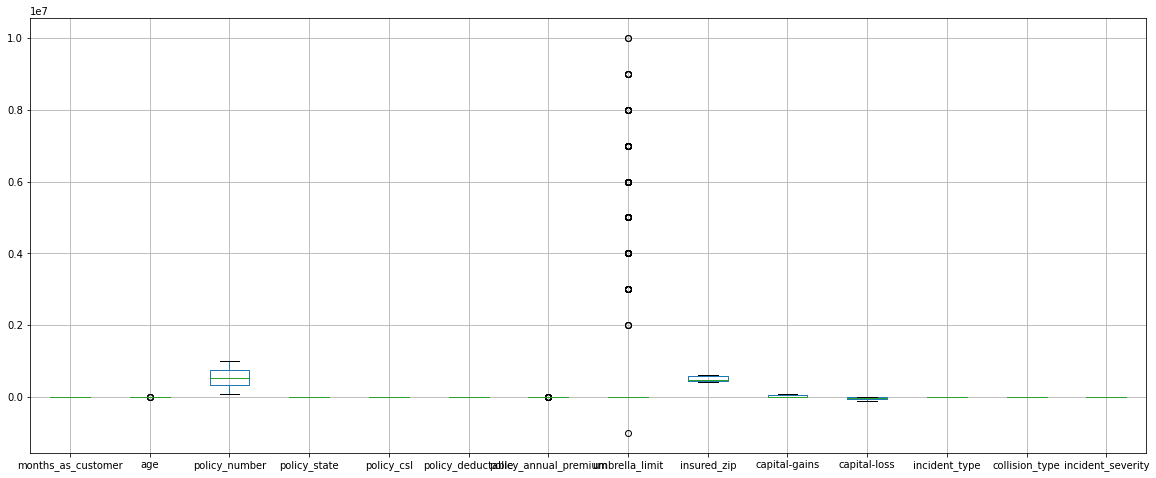

In [27]:
#Checking outliers with Boxplot Graph
df.iloc[:,0:14].boxplot(figsize=[20,8])

<AxesSubplot:>

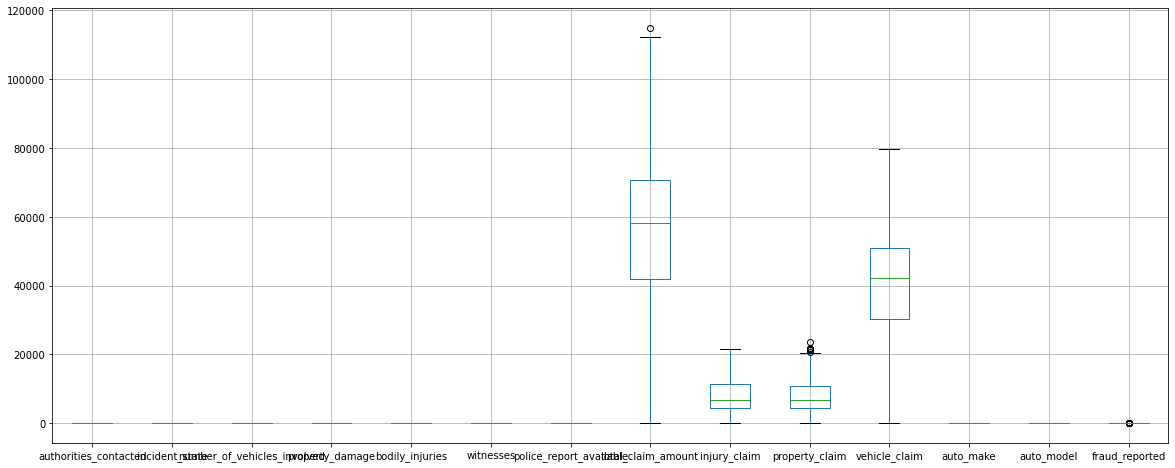

In [28]:
#Checking outliers with Boxplot Graph
df.iloc[:,14::].boxplot(figsize=[20,8])

In [29]:
#Improving Outliers
from scipy import stats
z=np.abs(stats.zscore(df))
df_new=(z<3).all(axis=1)
df=df[df_new]

In [30]:
#X,Y Split
X=df.drop('fraud_reported',axis=1)
Y=df['fraud_reported']

In [31]:
# Checking Skewness
X.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
number_of_vehicles_involved    0.509725
property_damage                0.101196
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936


In [32]:
#Improving Skewness
from sklearn.preprocessing import power_transform
pt=power_transform(X, method='yeo-johnson')
X=pd.DataFrame(pt, columns=X.columns)
X.skew()

months_as_customer            -0.133972
age                           -0.002183
policy_number                 -0.161791
policy_state                  -0.150765
policy_csl                    -0.096814
policy_deductable              0.022179
policy_annual_premium         -0.007258
umbrella_limit                -7.932397
insured_zip                    0.000000
capital-gains                  0.031294
capital-loss                   0.088750
incident_type                 -0.095572
collision_type                -0.204055
incident_severity             -0.079569
authorities_contacted         -0.223816
incident_state                -0.256064
number_of_vehicles_involved    0.372833
property_damage               -0.093063
bodily_injuries               -0.133824
witnesses                     -0.151669
police_report_available        0.796221
total_claim_amount            -0.508540
injury_claim                  -0.416732
property_claim                -0.357397
vehicle_claim                 -0.521805


In [33]:
#Importing Libraries required for prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import r2_score

In [34]:
#Finding Best Random State
maxAcc=0
maxRS=0
for i in range(1,100):
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=i, test_size=0.3)
    LR=LogisticRegression()
    LR.fit(X_train,Y_train)
    pred=LR.predict(X_test)
    acc=accuracy_score(Y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Best accuracy is', maxAcc,'on Random_state', maxRS)

Best accuracy is 0.8061224489795918 on Random_state 1
Best accuracy is 0.8367346938775511 on Random_state 8


In [35]:
#Train-Test Split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=8, test_size=0.3)

# ML Algorithms

In [36]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
predlr=lr.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test,predlr))
print('Confusion Matrix :', confusion_matrix(Y_test,predlr))
print('Classification Report :', classification_report(Y_test,predlr))

Accuracy Score : 0.8367346938775511
Confusion Matrix : [[215  19]
 [ 29  31]]
Classification Report :               precision    recall  f1-score   support

           0       0.88      0.92      0.90       234
           1       0.62      0.52      0.56        60

    accuracy                           0.84       294
   macro avg       0.75      0.72      0.73       294
weighted avg       0.83      0.84      0.83       294



In [37]:
#Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
preddtc=dtc.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test,preddtc))
print('Confusion Matrix :', confusion_matrix(Y_test,preddtc))
print('Classification Report :', classification_report(Y_test,preddtc))

Accuracy Score : 0.717687074829932
Confusion Matrix : [[187  47]
 [ 36  24]]
Classification Report :               precision    recall  f1-score   support

           0       0.84      0.80      0.82       234
           1       0.34      0.40      0.37        60

    accuracy                           0.72       294
   macro avg       0.59      0.60      0.59       294
weighted avg       0.74      0.72      0.73       294



In [38]:
#Random Forest Classifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
predrfc=rfc.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test,predrfc))
print('Confusion Matrix :', confusion_matrix(Y_test,predrfc))
print('Classification Report :', classification_report(Y_test,predrfc))

Accuracy Score : 0.8197278911564626
Confusion Matrix : [[218  16]
 [ 37  23]]
Classification Report :               precision    recall  f1-score   support

           0       0.85      0.93      0.89       234
           1       0.59      0.38      0.46        60

    accuracy                           0.82       294
   macro avg       0.72      0.66      0.68       294
weighted avg       0.80      0.82      0.80       294



In [39]:
#SVC Model
svc=SVC()
svc.fit(X_train,Y_train)
predsvc=svc.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test,predsvc))
print('Confusion Matrix :', confusion_matrix(Y_test,predsvc))
print('Classification Report :', classification_report(Y_test,predsvc))

Accuracy Score : 0.8129251700680272
Confusion Matrix : [[223  11]
 [ 44  16]]
Classification Report :               precision    recall  f1-score   support

           0       0.84      0.95      0.89       234
           1       0.59      0.27      0.37        60

    accuracy                           0.81       294
   macro avg       0.71      0.61      0.63       294
weighted avg       0.79      0.81      0.78       294



# Cross Validation Score

In [40]:
#Logistic Regression
from sklearn.model_selection import cross_val_score 
src1=cross_val_score(lr,X,Y,cv=5)
print('Cross Validation Score:', src1.mean())

Cross Validation Score: 0.7918367346938775


In [41]:
#Decision Tree Classifier
src2=cross_val_score(dtc,X,Y,cv=5)
print('Cross Validation Score:', src2.mean())

Cross Validation Score: 0.6979591836734694


In [42]:
#Random Forest Classifier
src3=cross_val_score(rfc,X,Y,cv=5)
print('Cross Validation Score:', src3.mean())

Cross Validation Score: 0.7816326530612245


In [43]:
#SVC
src4=cross_val_score(svc,X,Y,cv=5)
print('Cross Validation Score:', src4.mean())

Cross Validation Score: 0.7724489795918368


# Hyper Tuning Parameter

In [44]:
#Grid SearchCV
from sklearn.model_selection import GridSearchCV
parameter={'criterion':['entropy','gini'], 'max_depth':np.arange(2,15)}
gcv=GridSearchCV(rfc,parameter,cv=5)
gcv.fit(X_train,Y_train)
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 9}

Best parameters are criterion-gini with max_depth 12.

In [45]:
#Predicting values from Grid SearchCV
predgcv=gcv.best_estimator_.predict(X_test)
accuracy_score(Y_test,predgcv)

0.8095238095238095

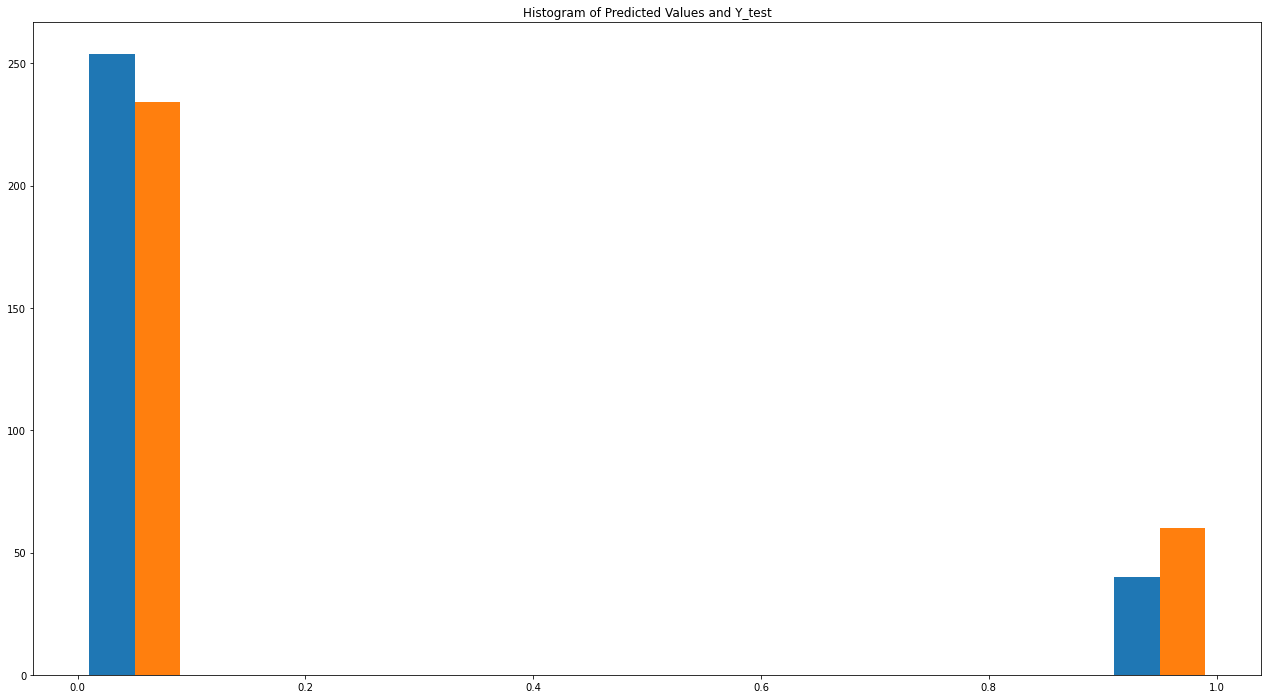

In [46]:
plt.figure(figsize=[22,12])
plt.hist([predgcv,Y_test])
plt.title('Histogram of Predicted Values and Y_test')
plt.show()

In [47]:
#Saving Model
import joblib
joblib.dump(gcv.best_estimator_,'Automobile_Insurance_Fraud_Prediction.pk1')

['Automobile_Insurance_Fraud_Prediction.pk1']

# Conclusion

In this project we observed that Random Forest Classifier is our best fit model with accuracy score of 80% which gives accuracy score of 82% with best parameters that are criterion-gini with max_depth 12. We can notice in our graph that, there are around 260 people who are not fraud while around 40 people who might be fraud.